## 1. Simple Linear Regression

In [1]:
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = {
    'Temperature': [26, 27, 28, 29, 30, 31, 32, 33],
    'Number of Sells': [270, 280, 290, 300, 310, 320, 330, 340]
}
df = DataFrame(data)

In [2]:
df

,Number of Sells,Temperature
0,270,26
1,280,27
2,290,28
3,300,29
4,310,30
5,320,31
6,330,32
7,340,33


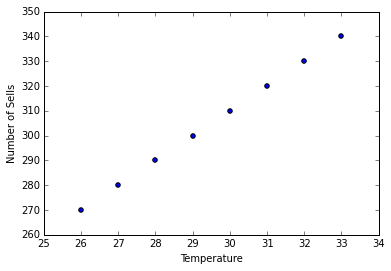

In [3]:
df.plot(kind="scatter", x="Temperature", y="Number of Sells")

In [4]:
df['Temperature'].values

array([26, 27, 28, 29, 30, 31, 32, 33])

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Temperature'].values, df['Number of Sells'].values)

In [6]:
print "slope: ", slope, ", intercept: ", intercept, ", r_value: ", r_value, ", p_value: ", p_value, ", std_err: ", std_err

slope:  10.0 , intercept:  10.0 , r_value:  1.0 , p_value:  2.5e-60 , std_err:  0.0


## 2. Linear Regression with Real Data

In [7]:
import urllib2
import json

path = 'https://raw.githubusercontent.com/bluebibi/python-for-data-analysis/master/data_science/death_rate.csv'
raw_csv = urllib2.urlopen(path)
df = pd.read_csv(raw_csv)

In [8]:
df

,I,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,D
0,1,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,0.921
1,2,35,23,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,10,39,57,0.997
2,3,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,0.962
3,4,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,0.982
4,5,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1.071
5,6,53,45,80,7.7,3.45,10.2,66.8,3325,38.5,43.1,25.5,30,32,72,54,1.030
6,7,43,30,74,10.9,3.23,12.1,83.9,4679,3.5,49.2,11.3,21,32,62,56,0.934
7,8,45,30,73,9.3,3.29,10.6,86.0,2140,5.3,40.4,10.5,6,4,4,56,0.899
8,9,36,24,70,9.0,3.31,10.5,83.2,6582,8.1,42.5,12.6,18,12,37,61,1.001
9,10,36,27,72,9.5,3.36,10.7,79.3,4213,6.7,41.0,13.2,12,7,20,59,0.912


In [9]:
df2 = df[['A1','D']]

In [10]:
df2

,A1,D
0,36,0.921
1,35,0.997
2,44,0.962
3,47,0.982
4,43,1.071
5,53,1.030
6,43,0.934
7,45,0.899
8,36,1.001
9,36,0.912


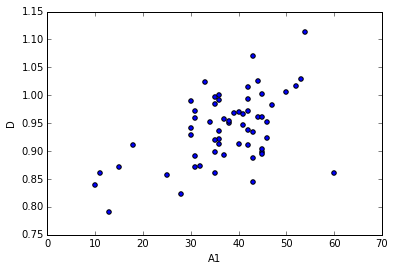

In [11]:
df2.plot(kind="scatter", x="A1", y="D")

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['A1'].values, df['D'].values)

In [15]:
print "slope: ", slope, ", intercept: ", intercept, ", r_value: ", r_value, ", p_value: ", p_value, ", std_err: ", std_err

slope:  0.00318278570538 , intercept:  0.820936574142 , r_value:  0.510589815446 , p_value:  3.07228582512e-05 , std_err:  0.000703770456645
